<a href="https://colab.research.google.com/github/ThomalaSahithi/OIBSIP/blob/main/Unemployment_Analysis_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UNEMPLOYMENT ANALYSIS WITH PYTHON

In [3]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOADING THE DATASET

In [4]:
# loading dataset
df = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')
# printing first 6 rows
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [5]:
#printing column names
print(df.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


INFORMATION AND STATISTICS OF THE DATASET

In [6]:
#basic information about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None


In [7]:
#summary statistics
print(df.describe())

        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.

In [8]:
#converting data column to datatype format
df[' Date'] = pd.to_datetime(df[' Date'])

<ipython-input-8-3a1b2253ddfb>:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


CLEANING THE DATASET

In [9]:
# Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Drop rows where 'date' or 'unemployment_rate' are missing
df.dropna(subset=[' Date', ' Estimated Unemployment Rate (%)'], inplace=True)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Using IQR method to identify outliers
Q1 = df[' Estimated Unemployment Rate (%)'].quantile(0.25)
Q3 = df[' Estimated Unemployment Rate (%)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df[' Estimated Unemployment Rate (%)'] >= lower_bound) & (df[' Estimated Unemployment Rate (%)'] <= upper_bound)]

Missing values before cleaning:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64
Number of duplicate rows: 0


VISUALIZATIONS

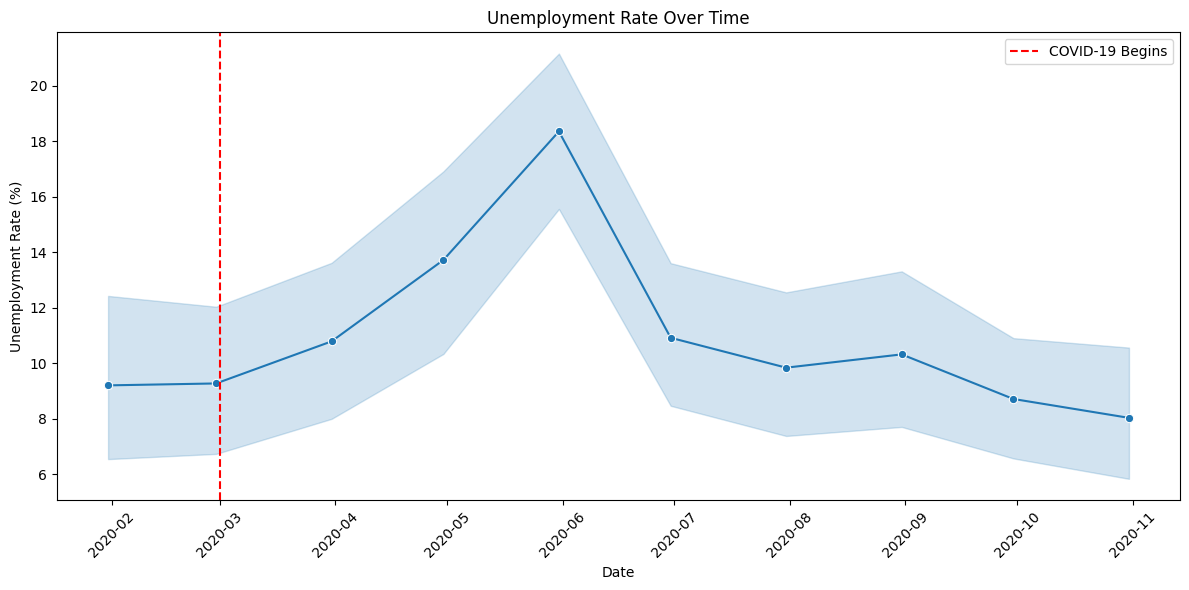

In [10]:
#Visualize unemployment rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=' Date', y=' Estimated Unemployment Rate (%)', marker='o')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.axvline(pd.Timestamp('2020-03-01'), color='red', linestyle='--', label='COVID-19 Begins')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

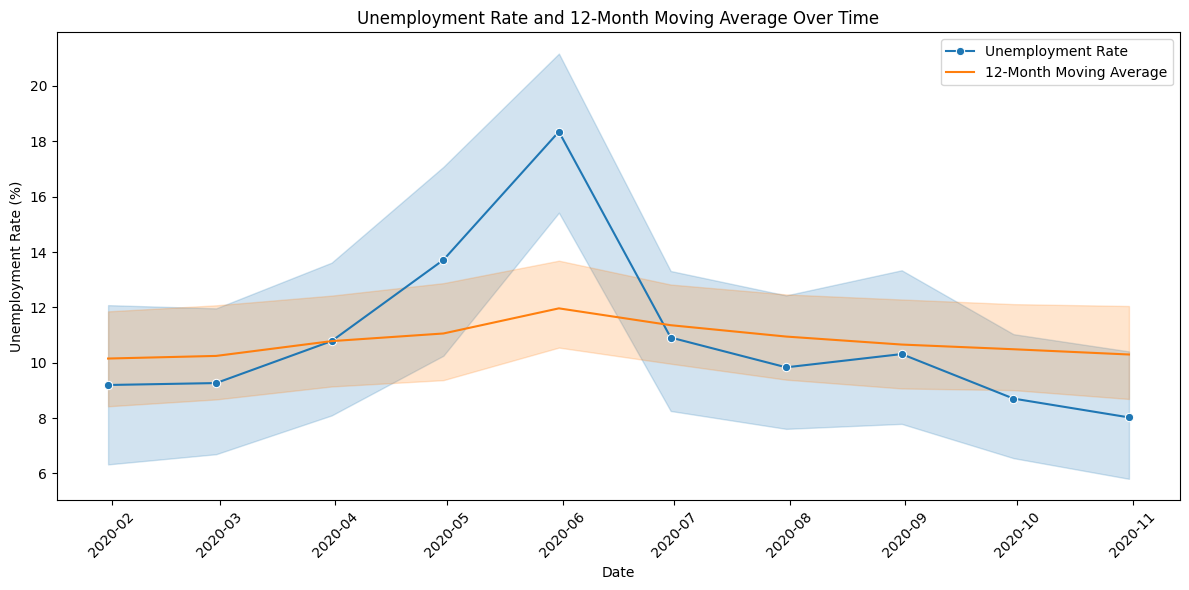

In [11]:
# moving average plot
df['Unemployment_MA'] = df[' Estimated Unemployment Rate (%)'].rolling(window=12).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=' Date', y=' Estimated Unemployment Rate (%)', marker='o', label='Unemployment Rate')
sns.lineplot(data=df, x=' Date', y='Unemployment_MA', label='12-Month Moving Average')
plt.title("Unemployment Rate and 12-Month Moving Average Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

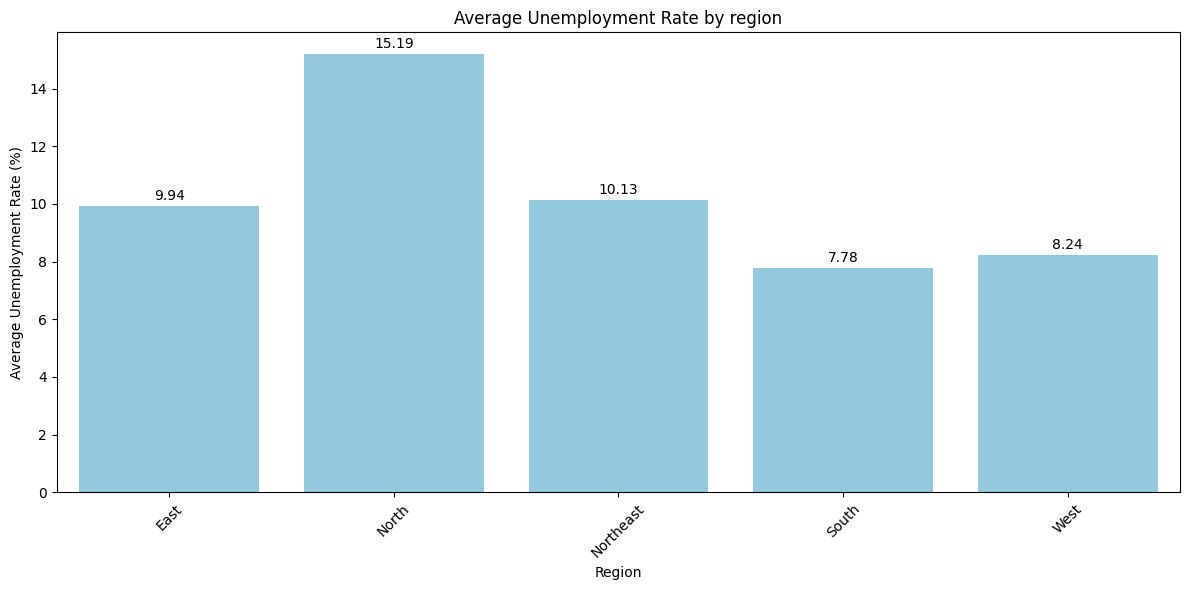

In [12]:
#Analyze unemployment by region
plt.figure(figsize=(12, 6))
average_unemployment_by_region = df.groupby('Region.1')[' Estimated Unemployment Rate (%)'].mean().reset_index()
sns.barplot(data=average_unemployment_by_region, x='Region.1', y=' Estimated Unemployment Rate (%)', color='skyblue')
for index, row in average_unemployment_by_region.iterrows():
    plt.text(index, row[' Estimated Unemployment Rate (%)'] + 0.2,
             f"{row[' Estimated Unemployment Rate (%)']:.2f}",
             color='black', ha='center')
plt.title('Average Unemployment Rate by region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
import plotly.express as px

df.columns = df.columns.str.strip()

# sunburst chart
fig = px.sunburst(
    df,
    path=['Region', 'Region.1', 'Frequency'],
    values='Estimated Unemployment Rate (%)',
    color='Estimated Unemployment Rate (%)',
    color_continuous_scale='viridis',
    title="Sunburst Chart of Unemployment Rate by Region and Frequency"
)
fig.show()


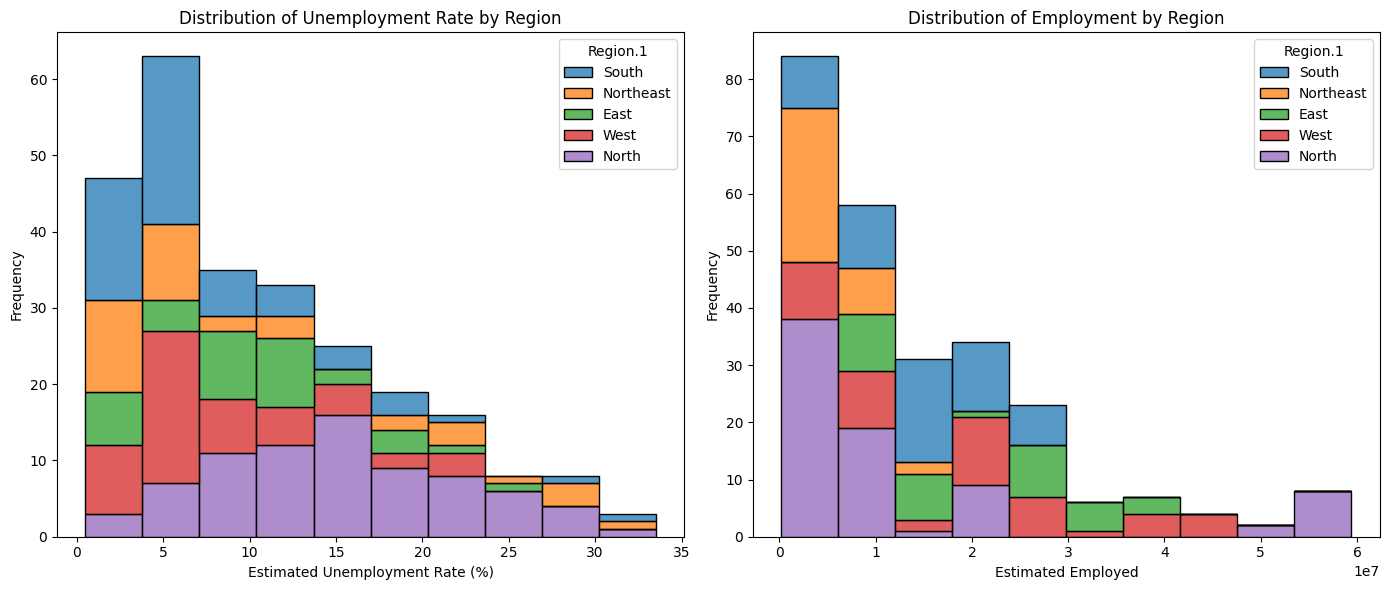

In [14]:
# histogram
df.columns = df.columns.str.strip()

# Set the figure size
plt.figure(figsize=(14, 6))

# histogram for 'Estimated Unemployment Rate (%)'
plt.subplot(1, 2, 1)
sns.histplot(df, x='Estimated Unemployment Rate (%)', hue='Region.1', multiple='stack', color='salmon')

plt.title('Distribution of Unemployment Rate by Region')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')

# histogram for 'Estimated Employed'
plt.subplot(1, 2, 2)
sns.histplot(df, x='Estimated Employed', hue='Region.1', multiple='stack', color='skyblue')

plt.title('Distribution of Employment by Region')
plt.xlabel('Estimated Employed')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


STATISTICAL ANALYSIS

In [15]:
# normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Unemployment Rate'] = scaler.fit_transform(df[['Estimated Unemployment Rate (%)']])

In [16]:
#checking for stationarity
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
result = adfuller(df['Estimated Unemployment Rate (%)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -7.151939777072764
p-value: 3.124730250512459e-10


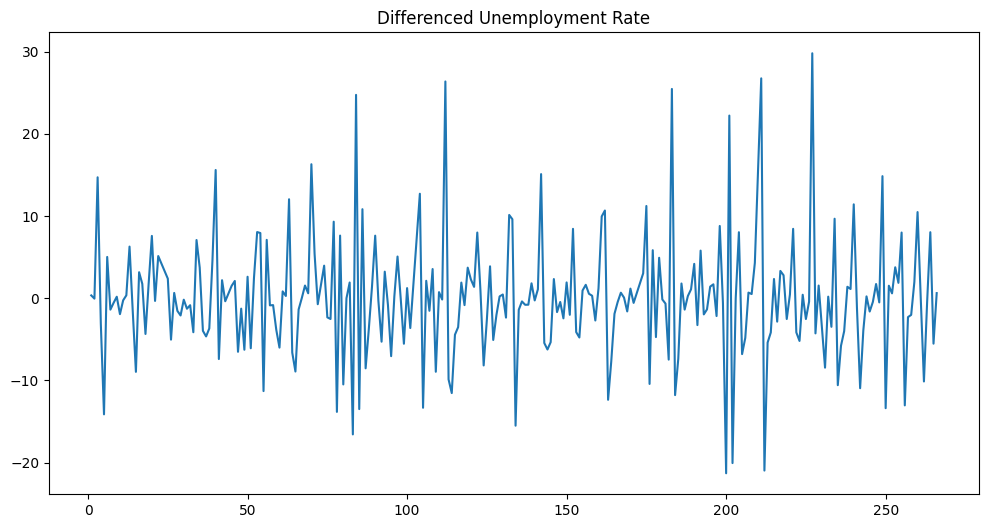

In [17]:
#series Stationarity
df['Differenced'] = df['Estimated Unemployment Rate (%)'].diff()
df['Differenced'].dropna().plot(figsize=(12, 6))
plt.title('Differenced Unemployment Rate')
plt.show()

TIME SERIES FORECASTING WITH ARIMA

<Figure size 1200x600 with 0 Axes>

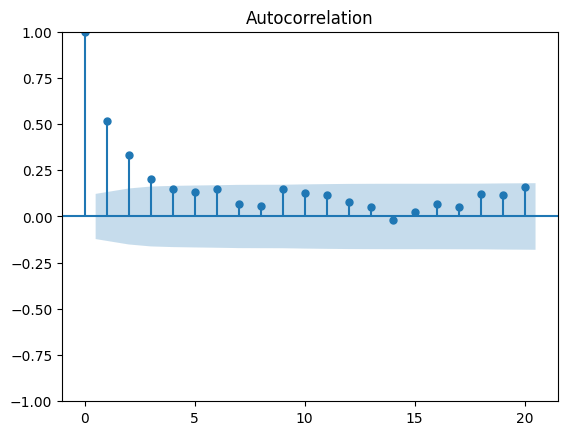

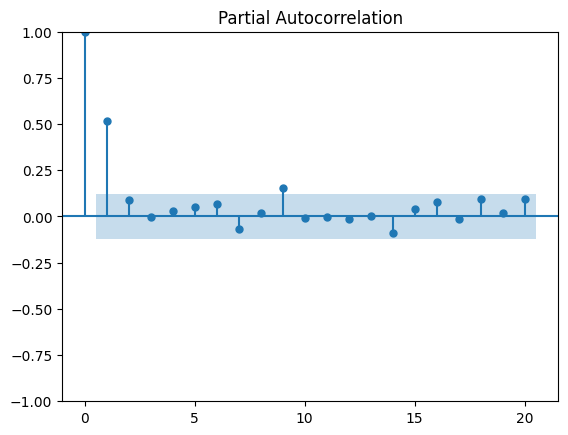

                                      SARIMAX Results                                      
Dep. Variable:     Estimated Unemployment Rate (%)   No. Observations:                  257
Model:                              ARIMA(1, 1, 1)   Log Likelihood                -841.252
Date:                             Tue, 12 Nov 2024   AIC                           1688.505
Time:                                     13:05:16   BIC                           1699.140
Sample:                                          0   HQIC                          1692.782
                                             - 257                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4526      0.061      7.428      0.000       0.333       0.572
ma.L1         -0.9451      

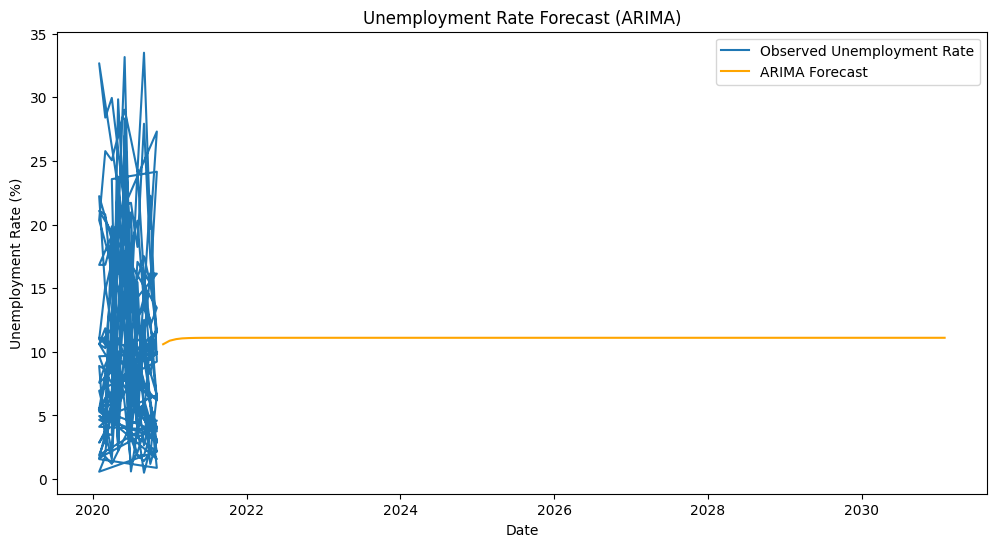

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(df['Estimated Unemployment Rate (%)'].dropna(), lags=20)
plot_pacf(df['Estimated Unemployment Rate (%)'].dropna(), lags=20)
plt.show()

# Fit ARIMA model
model = ARIMA(df['Estimated Unemployment Rate (%)'], order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

#Forecasting with ARIMA up to 2030
forecast_periods = (pd.to_datetime('2030-12-31') - df.index.max()).days // 30
forecast_periods = max(0, forecast_periods)
arima_forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_index = pd.date_range(start=df.index.max() + pd.DateOffset(months=1), periods=forecast_periods, freq='M')


# Forecasted series
arima_forecast_series = pd.Series(arima_forecast.predicted_mean.values, index=forecast_index)


# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Estimated Unemployment Rate (%)'], label='Observed Unemployment Rate')
plt.plot(arima_forecast_series, label='ARIMA Forecast', color='orange')
plt.title("Unemployment Rate Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()



FORECASTING WITH PROPHET

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzk_f6nx2/n0b06pvh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzk_f6nx2/qyue94wh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69389', 'data', 'file=/tmp/tmpzk_f6nx2/n0b06pvh.json', 'init=/tmp/tmpzk_f6nx2/qyue94wh.json', 'output', 'file=/tmp/tmpzk_f6nx2/prophet_model8zjon99f/prophet_model-20241112130517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:05:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:05:17 - cmdstanpy - INFO - Chain

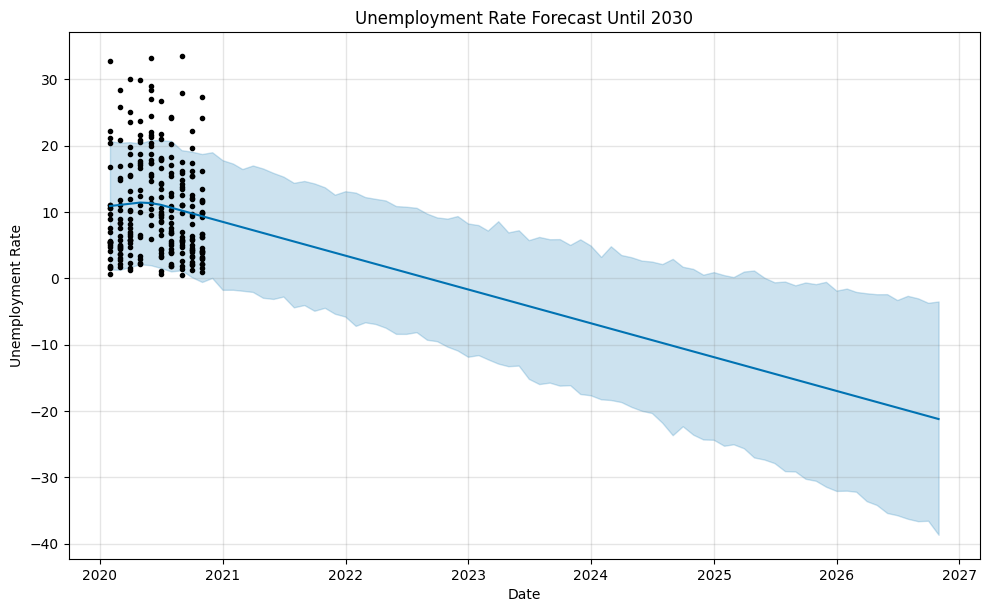

In [19]:
#prophet model
from prophet import Prophet
df_prophet = df.reset_index()[['Date', 'Estimated Unemployment Rate (%)']].rename(columns={'Date': 'ds', 'Estimated Unemployment Rate (%)': 'y'})
if df_prophet.isnull().sum().any():
    df_prophet.dropna(inplace=True)

# Initialize and fit the model
model = Prophet()
model.fit(df_prophet)

#  Create a DataFrame for future dates
future = model.make_future_dataframe(periods=72, freq='ME')

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Unemployment Rate Forecast Until 2030")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.show()

In [20]:
#Save the cleaned data or visualizations
df.to_csv('cleaned_unemployment_data.csv', index=False)